In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI 
from dotenv import load_dotenv  
import os

In [2]:
load_dotenv()  # take environment variables from .env.

True

In [4]:
parent_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0, google_api_key=os.getenv("GOOGLE_API_KEY"))

child_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0, google_api_key=os.getenv("GOOGLE_API_KEY"))

In [6]:
class ParentState(TypedDict):
    question : str 
    answer_eng : str 
    answer_hindi : str

In [23]:
def translate_to_hindi(state: ParentState) -> ParentState:
    prompt = f"Translate the following English text to Hindi:\n\n{state['answer_eng']}\n\nHindi Translation:"
    hindi_text = child_llm.invoke(prompt)
    return {"answer_hindi": hindi_text}

In [24]:
sub_graph = StateGraph(ParentState) 
sub_graph.add_node("translate_to_hindi", translate_to_hindi) 

sub_graph.add_edge(START, "translate_to_hindi")
sub_graph.add_edge("translate_to_hindi", END)

sub_graph = sub_graph.compile()

In [25]:
def generate_english_text(state: ParentState) -> ParentState:
    prompt = f"Generate a detailed answer in English for the following question:\n\n{state['question']}\n\nAnswer:"
    eng_text = parent_llm.invoke(prompt)
    return {"answer_eng": eng_text}

In [26]:
parent_graph_builder = StateGraph(ParentState)
parent_graph_builder.add_node("generate_english_text", generate_english_text)
parent_graph_builder.add_node("translate_answer", sub_graph)

parent_graph_builder.add_edge(START, "generate_english_text")
parent_graph_builder.add_edge("generate_english_text", "translate_answer")
parent_graph_builder.add_edge("translate_answer", END)
parent_graph = parent_graph_builder.compile()

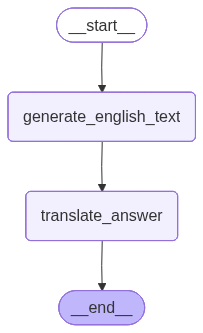

In [27]:
parent_graph

In [28]:
question = {
    "question": "Explain the theory of relativity."
}

result = parent_graph.invoke(question)
print("Final Result:", result)

Final Result: {'question': 'Explain the theory of relativity.', 'answer_eng': AIMessage(content='The Theory of Relativity, developed by Albert Einstein, is one of the most profound and revolutionary scientific theories of the 20th century. It fundamentally changed our understanding of space, time, gravity, and the universe itself, overthrowing many long-held Newtonian concepts. It is actually composed of two main theories: **Special Relativity** (1905) and **General Relativity** (1915).\n\n---\n\n### **1. Special Relativity (SR)**\n\n**Context and Motivation:**\nBefore Einstein, Isaac Newton\'s laws of motion and universal gravitation dominated physics. However, in the late 19th century, physicists encountered problems, particularly when trying to reconcile Newton\'s mechanics with James Clerk Maxwell\'s laws of electromagnetism, which described light as an electromagnetic wave traveling at a constant speed (denoted as \'c\'). This constant speed of light posed a paradox: if light\'s s

Final Result: {'question': 'Explain the theory of relativity.', 'answer_eng': AIMessage(content='The Theory of Relativity, developed by Albert Einstein, is one of the most profound and revolutionary scientific theories of the 20th century. It fundamentally changed our understanding of space, time, gravity, and the universe itself, overthrowing many long-held Newtonian concepts. It is actually composed of two main theories: **Special Relativity** (1905) and **General Relativity** (1915).\n\n---\n\n### **1. Special Relativity (SR)**\n\n**Context and Motivation:**\nBefore Einstein, Isaac Newton\'s laws of motion and universal gravitation dominated physics. However, in the late 19th century, physicists encountered problems, particularly when trying to reconcile Newton\'s mechanics with James Clerk Maxwell\'s laws of electromagnetism, which described light as an electromagnetic wave traveling at a constant speed (denoted as \'c\'). This constant speed of light posed a paradox: if light\'s speed is constant, constant relative to *what*? The famous Michelson-Morley experiment (1887) failed to detect a hypothetical "aether" that light was thought to travel through, suggesting light\'s speed *was* indeed constant regardless of the observer\'s motion.\n\nEinstein resolved this paradox with two simple, yet revolutionary, postulates:\n\n**The Two Postulates of Special Relativity:**\n\n1.  **The Principle of Relativity:** The laws of physics are the same for all observers in uniform motion (i.e., moving at a constant velocity, not accelerating) relative to one another. These are called "inertial frames of reference."\n2.  **The Principle of the Constancy of the Speed of Light:** The speed of light in a vacuum (approximately 299,792,458 meters per second) is the same for all inertial observers, regardless of the motion of the light source or the observer.\n\n**Consequences of Special Relativity:**\n\nThese two postulates lead to a series of counter-intuitive, but experimentally verified, phenomena:\n\n*   **Time Dilation:** Clocks moving relative to an observer run slower than clocks at rest relative to the observer. If you were to travel near the speed of light, time would pass more slowly for you compared to someone stationary on Earth. This has been confirmed with atomic clocks on airplanes and the extended lifespan of cosmic ray muons.\n*   **Length Contraction:** The length of an object moving relative to an observer appears shorter along the direction of its motion compared to its length when at rest. An object traveling at relativistic speeds would appear "squashed" in its direction of travel.\n*   **Relativity of Simultaneity:** Events that appear simultaneous to one observer may not appear simultaneous to another observer who is in relative motion. There is no absolute "now" that all observers agree upon.\n*   **Mass-Energy Equivalence (E=mc²):** This is perhaps the most famous equation from special relativity. It states that mass (m) and energy (E) are interchangeable; they are different forms of the same thing, with the speed of light squared (c²) being the conversion factor. A small amount of mass can be converted into a tremendous amount of energy (as seen in nuclear reactions, e.g., in the sun or atomic bombs), and vice-versa.\n*   **No Absolute Frame of Reference:** There is no "ether" or absolute space to which all motion can be compared. All motion is relative.\n*   **The Speed Limit of the Universe:** Nothing with mass can travel at or exceed the speed of light in a vacuum. As an object approaches \'c\', its mass approaches infinity, and it would require infinite energy to accelerate it further.\n\n**Limitations of Special Relativity:**\nSpecial Relativity deals only with objects in **uniform motion** (constant velocity). It does not incorporate acceleration or, crucially, gravity.\n\n---\n\n### **2. General Relativity (GR)**\n\n**Context and Motivation:**\nEinstein spent another decade grappling with how to incorporate acceleration and gravity into his theory. Newton\'s theory of gravity, while incredibly successful for centuries, described gravity as an instantaneous force acting between objects across vast distances. This contradicted Special Relativity\'s premise that no information (including gravitational influence) can travel faster than the speed of light.\n\nEinstein\'s breakthrough came with the **Equivalence Principle**.\n\n**Key Principles of General Relativity:**\n\n1.  **The Equivalence Principle:** There is no experimental way to distinguish between being in a uniformly accelerating reference frame and being in a uniform gravitational field. For example, standing in an elevator accelerating upwards feels identical to standing in a strong gravitational field. This insight allowed Einstein to connect gravity to acceleration and, eventually, to the geometry of spacetime.\n2.  **Gravity as the Curvature of Spacetime:** This is the central idea of General Relativity. Instead of gravity being a force, Einstein proposed that massive objects (and energy) warp or curve the very fabric of space and time around them. Imagine a bowling ball placed on a stretched rubber sheet; it creates a dip. A marble rolling nearby would be drawn towards the bowling ball not because the bowling ball is pulling it, but because the sheet itself is curved.\n    *   **Spacetime:** This is a four-dimensional continuum that combines the three dimensions of space with the one dimension of time. Mass and energy tell spacetime how to curve, and spacetime tells mass and energy how to move.\n    *   **Geodesics:** Objects (like planets orbiting a star, or light rays) follow the "straightest possible paths" (called geodesics) through this curved spacetime. What appears to us as the "force" of gravity pulling objects together is actually objects simply following these curved paths.\n\n**Consequences and Predictions of General Relativity:**\n\nGeneral Relativity makes several profound predictions, many of which have been confirmed experimentally:\n\n*   **Gravitational Time Dilation:** Clocks run slower in stronger gravitational fields. This means a clock on the surface of Earth runs slightly slower than a clock in orbit, and even slower than a clock far out in deep space. This effect is crucial for the precise functioning of GPS satellites, which must account for both special and general relativistic effects.\n*   **Gravitational Lensing:** Light itself follows the curvature of spacetime. Therefore, light from distant stars or galaxies can be bent as it passes near massive objects (like other galaxies or galaxy clusters), acting like a cosmic magnifying glass. This was famously confirmed by Arthur Eddington during a solar eclipse in 1919, when he observed starlight bending around the Sun.\n*   **Precession of Planetary Orbits:** General Relativity accurately explains the anomalous precession of Mercury\'s perihelion (the point in its orbit closest to the Sun), a small deviation that Newtonian mechanics couldn\'t fully account for.\n*   **Gravitational Waves:** Ripples in spacetime caused by accelerating massive objects (like merging black holes or neutron stars) that propagate outwards at the speed of light. These were directly detected for the first time by the LIGO experiment in 2015, confirming a century-old prediction.\n*   **Black Holes:** Regions of spacetime where gravity is so intense that nothing, not even light, can escape. General Relativity predicts their existence when sufficiently massive stars collapse under their own gravity.\n\n---\n\n### **Summary and Impact:**\n\nThe Theory of Relativity, encompassing both its special and general forms, completely reshaped our understanding of the universe:\n\n*   It unified space and time into a single entity (spacetime).\n*   It replaced the Newtonian concept of gravity as a force with gravity as a manifestation of spacetime curvature.\n*   It introduced the concept of the ultimate cosmic speed limit (the speed of light).\n*   It provided the foundation for modern cosmology, explaining the evolution and structure of the universe, including phenomena like the Big Bang, black holes, and neutron stars.\n*   Its effects, while most dramatic at very high speeds or in strong gravitational fields, are present everywhere and are essential for technologies like GPS.\n\nEinstein\'s theory is a triumph of human intellect, demonstrating how abstract thought and mathematical reasoning can unlock the deepest secrets of the cosmos.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c136c-2257-7760-b6ec-df414e04f88a-0', usage_metadata={'input_tokens': 22, 'output_tokens': 3135, 'total_tokens': 3157, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1452}}), 'answer_hindi': AIMessage(content='अल्बर्ट आइंस्टीन द्वारा विकसित सापेक्षता का सिद्धांत (The Theory of Relativity), 20वीं सदी के सबसे गहन और क्रांतिकारी वैज्ञानिक सिद्धांतों में से एक है। इसने अंतरिक्ष, समय, गुरुत्वाकर्षण और स्वयं ब्रह्मांड के बारे में हमारी समझ को मौलिक रूप से बदल दिया, जिससे न्यूटन की कई पुरानी अवधारणाएँ समाप्त हो गईं। यह वास्तव में दो मुख्य सिद्धांतों से बना है: **विशेष सापेक्षता** (1905) और **सामान्य सापेक्षता** (1915)।\n\n---\n\n### **1. विशेष सापेक्षता (Special Relativity - SR)**\n\n**संदर्भ और प्रेरणा:**\nआइंस्टीन से पहले, आइजैक न्यूटन के गति के नियम और सार्वभौमिक गुरुत्वाकर्षण भौतिकी पर हावी थे। हालांकि, 19वीं सदी के अंत में, भौतिकविदों को समस्याओं का सामना करना पड़ा, खासकर जब वे न्यूटन के यांत्रिकी को जेम्स क्लर्क मैक्सवेल के विद्युत चुम्बकीयता के नियमों के साथ समेटने की कोशिश कर रहे थे, जिन्होंने प्रकाश को एक स्थिर गति (\'c\' द्वारा दर्शाया गया) से चलने वाली विद्युत चुम्बकीय तरंग के रूप में वर्णित किया था। प्रकाश की यह स्थिर गति एक विरोधाभास प्रस्तुत करती थी: यदि प्रकाश की गति स्थिर है, तो *किसके* सापेक्ष स्थिर है? प्रसिद्ध माइकलसन-मोर्ले प्रयोग (1887) एक काल्पनिक "ईथर" का पता लगाने में विफल रहा, जिसके माध्यम से प्रकाश के यात्रा करने की कल्पना की गई थी, जिससे यह पता चला कि प्रकाश की गति वास्तव में प्रेक्षक की गति की परवाह किए बिना स्थिर *थी*।\n\nआइंस्टीन ने दो सरल, फिर भी क्रांतिकारी अभिधारणाओं के साथ इस विरोधाभास को हल किया:\n\n**विशेष सापेक्षता की दो अभिधारणाएँ:**\n\n1.  **सापेक्षता का सिद्धांत:** भौतिकी के नियम एक दूसरे के सापेक्ष समान गति (यानी, निरंतर वेग से चलने वाले, त्वरित नहीं होने वाले) में सभी प्रेक्षकों के लिए समान होते हैं। इन्हें "जड़त्वीय संदर्भ फ्रेम" कहा जाता है।\n2.  **प्रकाश की गति की स्थिरता का सिद्धांत:** निर्वात में प्रकाश की गति (लगभग 299,792,458 मीटर प्रति सेकंड) सभी जड़त्वीय प्रेक्षकों के लिए समान होती है, चाहे प्रकाश स्रोत या प्रेक्षक की गति कुछ भी हो।\n\n**विशेष सापेक्षता के परिणाम:**\n\nये दो अभिधारणाएँ कई प्रति-सहज, लेकिन प्रायोगिक रूप से सत्यापित, घटनाओं की ओर ले जाती हैं:\n\n*   **समय विस्तार (Time Dilation):** एक प्रेक्षक के सापेक्ष गतिमान घड़ियाँ प्रेक्षक के सापेक्ष स्थिर घड़ियों की तुलना में धीमी चलती हैं। यदि आप प्रकाश की गति के करीब यात्रा करते हैं, तो पृथ्वी पर स्थिर किसी व्यक्ति की तुलना में आपके लिए समय धीमा गुजरेगा। इसकी पुष्टि हवाई जहाजों पर परमाणु घड़ियों और ब्रह्मांडीय किरण म्यूऑन के विस्तारित जीवनकाल से हुई है।\n*   **लंबाई संकुचन (Length Contraction):** एक प्रेक्षक के सापेक्ष गतिमान वस्तु की लंबाई उसकी गति की दिशा में उसकी स्थिर अवस्था की लंबाई की तुलना में छोटी दिखाई देती है। सापेक्षतावादी गति से यात्रा करने वाली वस्तु अपनी यात्रा की दिशा में "दबी हुई" दिखाई देगी।\n*   **समकालिकता की सापेक्षता (Relativity of Simultaneity):** जो घटनाएँ एक प्रेक्षक के लिए एक साथ घटित होती हुई प्रतीत होती हैं, वे दूसरे प्रेक्षक के लिए एक साथ घटित होती हुई प्रतीत नहीं हो सकती हैं जो सापेक्ष गति में है। कोई पूर्ण "अभी" नहीं है जिस पर सभी प्रेक्षक सहमत हों।\n*   **द्रव्यमान-ऊर्जा समतुल्यता (E=mc²):** यह शायद विशेष सापेक्षता का सबसे प्रसिद्ध समीकरण है। यह बताता है कि द्रव्यमान (m) और ऊर्जा (E) विनिमेय हैं; वे एक ही चीज़ के विभिन्न रूप हैं, जिसमें प्रकाश की गति का वर्ग (c²) रूपांतरण कारक है। द्रव्यमान की एक छोटी मात्रा को अत्यधिक ऊर्जा में परिवर्तित किया जा सकता है (जैसा कि परमाणु प्रतिक्रियाओं में देखा जाता है, उदा. सूर्य में या परमाणु बमों में), और इसके विपरीत।\n*   **कोई निरपेक्ष संदर्भ फ्रेम नहीं (No Absolute Frame of Reference):** कोई "ईथर" या निरपेक्ष स्थान नहीं है जिससे सभी गति की तुलना की जा सके। सभी गति सापेक्ष है।\n*   **ब्रह्मांड की गति सीमा (The Speed Limit of the Universe):** द्रव्यमान वाली कोई भी वस्तु निर्वात में प्रकाश की गति से या उससे अधिक गति से यात्रा नहीं कर सकती है। जैसे-जैसे कोई वस्तु \'c\' के करीब आती है, उसका द्रव्यमान अनंत के करीब पहुंच जाता है, और उसे और तेज करने के लिए अनंत ऊर्जा की आवश्यकता होगी।\n\n**विशेष सापेक्षता की सीमाएँ:**\nविशेष सापेक्षता केवल **समान गति** (निरंतर वेग) में वस्तुओं से संबंधित है। इसमें त्वरण या, महत्वपूर्ण रूप से, गुरुत्वाकर्षण शामिल नहीं है।\n\n---\n\n### **2. सामान्य सापेक्षता (General Relativity - GR)**\n\n**संदर्भ और प्रेरणा:**\nआइंस्टीन ने एक और दशक तक इस बात पर विचार किया कि त्वरण और गुरुत्वाकर्षण को अपने सिद्धांत में कैसे शामिल किया जाए। गुरुत्वाकर्षण का न्यूटन का सिद्धांत, सदियों तक अविश्वसनीय रूप से सफल रहा, गुरुत्वाकर्षण को वस्तुओं के बीच विशाल दूरियों पर काम करने वाले एक तात्कालिक बल के रूप में वर्णित करता था। यह विशेष सापेक्षता के इस आधार का खंडन करता था कि कोई भी जानकारी (गुरुत्वाकर्षण प्रभाव सहित) प्रकाश की गति से तेज यात्रा नहीं कर सकती है।\n\nआइंस्टीन की सफलता **तुल्यता सिद्धांत (Equivalence Principle)** के साथ आई।\n\n**सामान्य सापेक्षता के प्रमुख सिद्धांत:**\n\n1.  **तुल्यता सिद्धांत (The Equivalence Principle):** एक समान रूप से त्वरित संदर्भ फ्रेम में होने और एक समान गुरुत्वाकर्षण क्षेत्र में होने के बीच अंतर करने का कोई प्रायोगिक तरीका नहीं है। उदाहरण के लिए, ऊपर की ओर त्वरित लिफ्ट में खड़े होने पर एक मजबूत गुरुत्वाकर्षण क्षेत्र में खड़े होने जैसा ही महसूस होता है। इस अंतर्दृष्टि ने आइंस्टीन को गुरुत्वाकर्षण को त्वरण से, और अंततः, अंतरिक्ष-समय की ज्यामिति से जोड़ने की अनुमति दी।\n2.  **अंतरिक्ष-समय की वक्रता के रूप में गुरुत्वाकर्षण (Gravity as the Curvature of Spacetime):** यह सामान्य सापेक्षता का केंद्रीय विचार है। गुरुत्वाकर्षण को एक बल मानने के बजाय, आइंस्टीन ने प्रस्तावित किया कि विशाल वस्तुएँ (और ऊर्जा) अपने चारों ओर अंतरिक्ष और समय के ताने-बाने को मोड़ती या वक्रित करती हैं। एक खिंची हुई रबर की शीट पर रखी गई गेंदबाजी की गेंद की कल्पना करें; यह एक गर्त बनाती है। पास में लुढ़कने वाला एक संगमरमर गेंदबाजी की गेंद की ओर खींचा जाएगा, इसलिए नहीं कि गेंदबाजी की गेंद उसे खींच रही है, बल्कि इसलिए कि शीट स्वयं वक्रित है।\n    *   **अंतरिक्ष-समय (Spacetime):** यह एक चार-आयामी सातत्य है जो अंतरिक्ष के तीन आयामों को समय के एक आयाम के साथ जोड़ता है। द्रव्यमान और ऊर्जा अंतरिक्ष-समय को बताते हैं कि कैसे वक्रित होना है, और अंतरिक्ष-समय द्रव्यमान और ऊर्जा को बताता है कि कैसे चलना है।\n    *   **जियोडेसिक्स (Geodesics):** वस्तुएँ (जैसे किसी तारे की परिक्रमा करने वाले ग्रह, या प्रकाश किरणें) इस वक्रित अंतरिक्ष-समय के माध्यम से "सबसे सीधे संभव रास्तों" (जिन्हें जियोडेसिक्स कहा जाता है) का अनुसरण करती हैं। जो हमें वस्तुओं को एक साथ खींचने वाले गुरुत्वाकर्षण के "बल" के रूप में प्रतीत होता है, वह वास्तव में वस्तुएँ केवल इन वक्रित रास्तों का अनुसरण कर रही हैं।\n\n**सामान्य सापेक्षता के परिणाम और भविष्यवाणियाँ:**\n\nसामान्य सापेक्षता कई गहन भविष्यवाणियाँ करती है, जिनमें से कई की प्रायोगिक रूप से पुष्टि की गई है:\n\n*   **गुरुत्वाकर्षण संबंधी समय विस्तार (Gravitational Time Dilation):** मजबूत गुरुत्वाकर्षण क्षेत्रों में घड़ियाँ धीमी चलती हैं। इसका मतलब है कि पृथ्वी की सतह पर एक घड़ी कक्षा में एक घड़ी की तुलना में थोड़ी धीमी चलती है, और गहरे अंतरिक्ष में एक घड़ी की तुलना में और भी धीमी चलती है। यह प्रभाव जीपीएस उपग्रहों के सटीक कामकाज के लिए महत्वपूर्ण है, जिन्हें विशेष और सामान्य सापेक्षता दोनों प्रभावों का हिसाब देना होता है।\n*   **गुरुत्वाकर्षण लेंसिंग (Gravitational Lensing):** प्रकाश स्वयं अंतरिक्ष-समय की वक्रता का अनुसरण करता है। इसलिए, दूर के तारों या आकाशगंगाओं से आने वाला प्रकाश विशाल वस्तुओं (जैसे अन्य आकाशगंगाओं या आकाशगंगा समूहों) के पास से गुजरते समय मुड़ सकता है, जो एक ब्रह्मांडीय आवर्धक लेंस की तरह काम करता है। इसकी पुष्टि 1919 में एक सूर्य ग्रहण के दौरान आर्थर एडिंगटन ने प्रसिद्ध रूप से की थी, जब उन्होंने सूर्य के चारों ओर तारों के प्रकाश के मुड़ने का अवलोकन किया था।\n*   **ग्रहों की कक्षाओं का पुरस्सरण (Precession of Planetary Orbits):** सामान्य सापेक्षता बुध के उपसौर (इसकी कक्षा में सूर्य के सबसे करीब का बिंदु) के असामान्य पुरस्सरण की सटीक व्याख्या करती है, एक छोटा सा विचलन जिसका न्यूटनियन यांत्रिकी पूरी तरह से हिसाब नहीं दे सका।\n*   **गुरुत्वाकर्षण तरंगें (Gravitational Waves):** अंतरिक्ष-समय में लहरें जो त्वरित विशाल वस्तुओं (जैसे विलीन होते ब्लैक होल या न्यूट्रॉन तारे) के कारण उत्पन्न होती हैं और प्रकाश की गति से बाहर की ओर फैलती हैं। इनका पहली बार 2015 में LIGO प्रयोग द्वारा सीधे पता लगाया गया था, जिससे एक सदी पुरानी भविष्यवाणी की पुष्टि हुई।\n*   **ब्लैक होल (Black Holes):** अंतरिक्ष-समय के ऐसे क्षेत्र जहाँ गुरुत्वाकर्षण इतना तीव्र होता है कि कुछ भी नहीं, यहाँ तक कि प्रकाश भी, बच नहीं सकता। सामान्य सापेक्षता उनके अस्तित्व की भविष्यवाणी करती है जब पर्याप्त विशाल तारे अपने गुरुत्वाकर्षण के तहत ढह जाते हैं।\n\n---\n\n### **सारांश और प्रभाव:**\n\nसापेक्षता का सिद्धांत, जिसमें इसके विशेष और सामान्य दोनों रूप शामिल हैं, ने ब्रह्मांड के बारे में हमारी समझ को पूरी तरह से नया आकार दिया है:\n\n*   इसने अंतरिक्ष और समय को एक एकल इकाई (अंतरिक्ष-समय) में एकीकृत किया।\n*   इसने गुरुत्वाकर्षण के न्यूटनियन अवधारणा को एक बल के रूप में गुरुत्वाकर्षण के बजाय अंतरिक्ष-समय वक्रता की एक अभिव्यक्ति के रूप में प्रतिस्थापित किया।\n*   इसने परम ब्रह्मांडीय गति सीमा (प्रकाश की गति) की अवधारणा पेश की।\n*   इसने आधुनिक ब्रह्मांड विज्ञान की नींव प्रदान की, ब्रह्मांड के विकास और संरचना की व्याख्या की, जिसमें बिग बैंग, ब्लैक होल और न्यूट्रॉन तारे जैसी घटनाएँ शामिल हैं।\n*   इसके प्रभाव, जबकि बहुत अधिक गति या मजबूत गुरुत्वाकर्षण क्षेत्रों में सबसे नाटकीय होते हैं, हर जगह मौजूद हैं और जीपीएस जैसी प्रौद्योगिकियों के लिए आवश्यक हैं।\n\nआइंस्टीन का सिद्धांत मानव बुद्धि की एक विजय है, जो दर्शाता है कि कैसे अमूर्त विचार और गणितीय तर्क ब्रह्मांड के सबसे गहरे रहस्यों को उजागर कर सकते हैं।', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c136c-5fe8-70f1-adbb-8da7c9ca687c-0', usage_metadata={'input_tokens': 1919, 'output_tokens': 2870, 'total_tokens': 4789, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 497}})}